In [4]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:


def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = []

for tweet in tweepy.Cursor(extractor.user_timeline, screen_name="mylesb", exclude_replies=True, include_rts=False).items(500):
    tweets.append(tweet)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")

for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 500.

5 recent tweets:

A Jupyter notebook extension for geospatial visualization and analysis https://t.co/ynFETt7o8g

Using three Raspberry Pi 3Bs to analysis a billion NY taxi rides with Apache Spark https://t.co/lgFczt7YQj

Keybase Teams look awesome https://t.co/8E4CRqtGNU

The iPhone X’s notch is basically a Kinect https://t.co/iUeppEn1OC

I need a vacation.



In [ ]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

In [7]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

909968537623638016
2017-09-19 02:33:00
Buffer
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ynFETt7o8g', 'expanded_url': 'https://github.com/OpenGeoscience/geonotebook', 'display_url': 'github.com/OpenGeoscience…', 'indices': [71, 94]}]}


In [9]:
# We add relevant data:
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

NameError: name 'data' is not defined

In [97]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,The iPhone X’s notch is basically a Kinect htt...,66,909608440355545089,2017-09-18 02:42:06,Tweetbot for Mac,0,0
1,I need a vacation.,18,908753381283569665,2017-09-15 18:04:24,TweetDeck,1,0
2,Removing the white gars in Safari on iPhone X ...,69,908392108742062080,2017-09-14 18:08:50,Tweetbot for Mac,0,0
3,People are complaining that a woman wrote a bo...,82,908313266069409795,2017-09-14 12:55:32,Tweetbot for Mac,0,0
4,It’s 2017 and I still don’t have a robot that ...,108,908063068340486144,2017-09-13 20:21:21,Tweetbot for Mac,0,0
5,How did this get funding from three different ...,140,907978936222658562,2017-09-13 14:47:02,Tweetbot for Mac,1,0
6,The worst thing about crowds is they never tur...,63,907720827361222656,2017-09-12 21:41:24,Tweetbot for iΟS,0,0
7,If you had an hour to waste in the Dundas Squa...,72,907708352381276160,2017-09-12 20:51:50,Tweetbot for iΟS,0,0
8,I hate all chat applications equally.,37,907293548336345088,2017-09-11 17:23:33,Tweetbot for Mac,1,0
9,"""CSS in JavaScript is like replacing a broken ...",132,907279331600289792,2017-09-11 16:27:03,Buffer,4,3


In [98]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 81.336


In [99]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
At @shiroyuki's talk on writing maintainable code without testing at #PyConCA2016. https://t.co/eGCQ7im2KZ
Number of likes: 8
106 characters.

The tweet with more retweets is: 
The Python Data Science Handbook's Jupyter Notebooks are basicly the book, so awesome https://t.co/6ED7UTlKt2
Number of retweets: 5
109 characters.



In [100]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

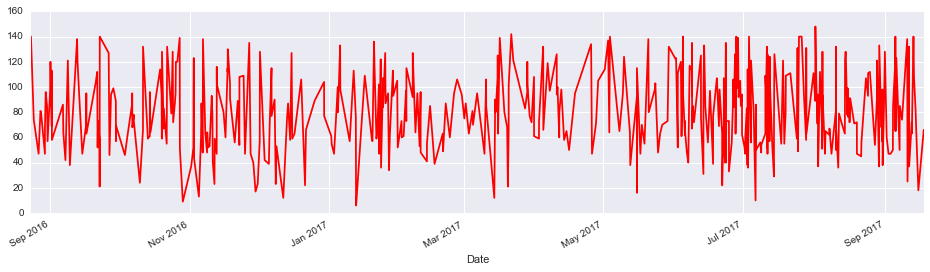

In [101]:
# Lenghts along time:
tlen.plot(figsize=(16, 4), color='r')

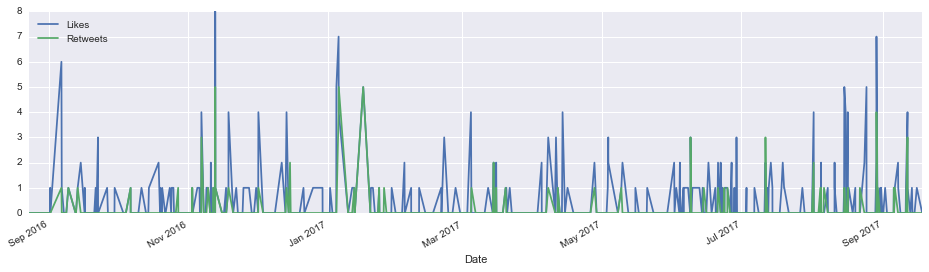

In [102]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16, 4), label="Likes", legend=True)
tret.plot(figsize=(16, 4), label="Retweets", legend=True)

In [103]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Tweetbot for Mac
* TweetDeck
* Tweetbot for iΟS
* Buffer
* IFTTT
* Twitter Web Client
* Twitter for iPad
* Twitter for iPhone
* Medium
* iOS
* Giphy Share
* Adobe Media Encoder
* Foursquare


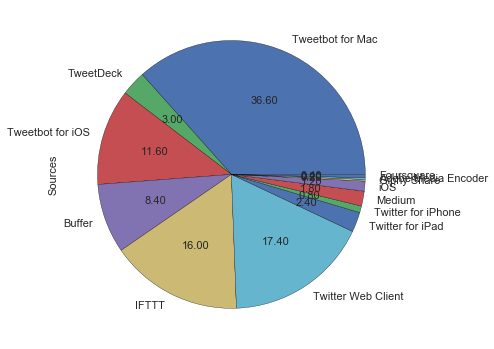

In [104]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))

In [105]:
from textblob import TextBlob
import re


def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [106]:
# We create a column with the result of the analysis:
data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['Tweets']])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The iPhone X’s notch is basically a Kinect htt...,66,909608440355545089,2017-09-18 02:42:06,Tweetbot for Mac,0,0,0
1,I need a vacation.,18,908753381283569665,2017-09-15 18:04:24,TweetDeck,1,0,0
2,Removing the white gars in Safari on iPhone X ...,69,908392108742062080,2017-09-14 18:08:50,Tweetbot for Mac,0,0,0
3,People are complaining that a woman wrote a bo...,82,908313266069409795,2017-09-14 12:55:32,Tweetbot for Mac,0,0,-1
4,It’s 2017 and I still don’t have a robot that ...,108,908063068340486144,2017-09-13 20:21:21,Tweetbot for Mac,0,0,-1
5,How did this get funding from three different ...,140,907978936222658562,2017-09-13 14:47:02,Tweetbot for Mac,1,0,0
6,The worst thing about crowds is they never tur...,63,907720827361222656,2017-09-12 21:41:24,Tweetbot for iΟS,0,0,-1
7,If you had an hour to waste in the Dundas Squa...,72,907708352381276160,2017-09-12 20:51:50,Tweetbot for iΟS,0,0,-1
8,I hate all chat applications equally.,37,907293548336345088,2017-09-11 17:23:33,Tweetbot for Mac,1,0,-1
9,"""CSS in JavaScript is like replacing a broken ...",132,907279331600289792,2017-09-11 16:27:03,Buffer,4,3,1


In [107]:
# We construct lists with classified tweets:

pos_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] > 0]

neu_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] == 0]

neg_tweets = [tweet for index, tweet in enumerate(
    data['Tweets']) if data['SA'][index] < 0]

In [108]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(
    len(pos_tweets) * 100 / len(data['Tweets'])))

print("Percentage of neutral tweets: {}%".format(
    len(neu_tweets) * 100 / len(data['Tweets'])))

print("Percentage de negative tweets: {}%".format(
    len(neg_tweets) * 100 / len(data['Tweets'])))

Percentage of positive tweets: 34.8%
Percentage of neutral tweets: 50.4%
Percentage de negative tweets: 14.8%
